# 0. Importing the libs and read the data

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, f1_score, 
    precision_score, recall_score, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 1. Data preparation and data cleaning

- The data is already cleaned
- I think it is strange that in the sample_submission i see only negative diabet prediction values (0)

In [33]:
train = pd.read_csv("./data/train.csv")
test  = pd.read_csv("./data/test.csv")
sample_submission  = pd.read_csv("./data/sample_submission.csv")

## Train data exploration

In [34]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [35]:
train.shape

(700000, 26)

In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [74]:
list(train.gender.unique())

['Female', 'Male', 'Other']

In [75]:
list(train.ethnicity.unique())

['Hispanic', 'White', 'Asian', 'Black', 'Other']

In [76]:
list(train.education_level.unique())

['Highschool', 'Graduate', 'Postgraduate', 'No formal']

In [77]:
list(train.income_level.unique())

['Lower-Middle', 'Upper-Middle', 'Low', 'Middle', 'High']

In [78]:
list(train.smoking_status.unique())

['Current', 'Never', 'Former']

In [79]:
list(train.employment_status.unique())

['Employed', 'Retired', 'Student', 'Unemployed']

In [38]:
train.isnull().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


## Test data exploration

In [39]:
test.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [40]:
test.shape

(300000, 25)

In [41]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,849999.500000,86602.684716,700000.00,774999.75,849999.50,924999.25,999999.00
age,300000.0,50.432397,11.938741,19.00,42.00,50.00,59.00,89.00
alcohol_consumption_per_week,300000.0,2.089693,1.066214,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,300000.0,92.349087,62.187399,1.00,51.00,77.00,115.00,748.00
diet_score,300000.0,5.945838,1.481068,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,300000.0,6.997795,0.914693,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,300000.0,6.011278,2.060472,0.60,4.60,6.00,7.40,15.90
bmi,300000.0,25.881906,2.894289,15.10,23.90,25.90,27.80,38.30
waist_to_hip_ratio,300000.0,0.859007,0.038523,0.69,0.83,0.86,0.89,1.05
systolic_bp,300000.0,116.374117,11.252146,91.00,108.00,116.00,124.00,170.00


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  heart_rate                

In [43]:
test.isnull().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


## Sample Submission data exploration

In [44]:
sample_submission.head()

,id,diagnosed_diabetes
0,700000,0
1,700001,0
2,700002,0
3,700003,0
4,700004,0


In [45]:
sample_submission.describe()

,id,diagnosed_diabetes
count,300000.000000,300000.0
mean,849999.500000,0.0
std,86602.684716,0.0
min,700000.000000,0.0
25%,774999.750000,0.0
50%,849999.500000,0.0
75%,924999.250000,0.0
max,999999.000000,0.0


In [46]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   id                  300000 non-null  int64
 1   diagnosed_diabetes  300000 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


In [47]:
sample_submission.isnull().sum()

id                    0
diagnosed_diabetes    0
dtype: int64

In [48]:
sample_submission[sample_submission['diagnosed_diabetes'] == 0].count()

id                    300000
diagnosed_diabetes    300000
dtype: int64

In [49]:
sample_submission[sample_submission['diagnosed_diabetes'] == 1].count()

id                    0
diagnosed_diabetes    0
dtype: int64

# 2. Exploratory Data Analysis

## 2.1 Target Variable Distribution (Class Balance)
What it shows:
- Whether diabetes is imbalanced

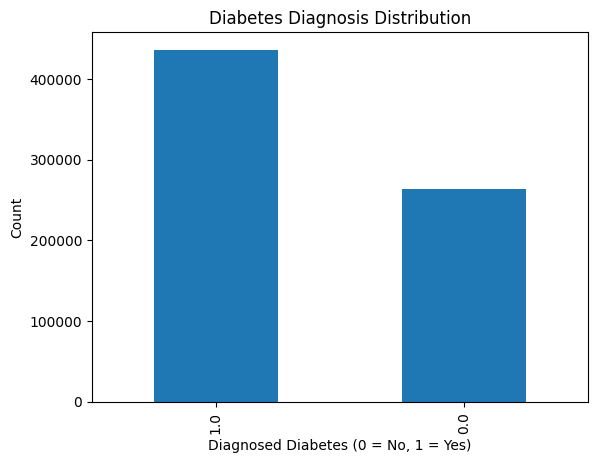

In [50]:
train['diagnosed_diabetes'].value_counts().plot(kind='bar')
plt.title("Diabetes Diagnosis Distribution")
plt.xlabel("Diagnosed Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## 2.2 Age Distribution (Histogram)
What it shows:
- Population age structure
- Diabetes risk by age (later combined with target)

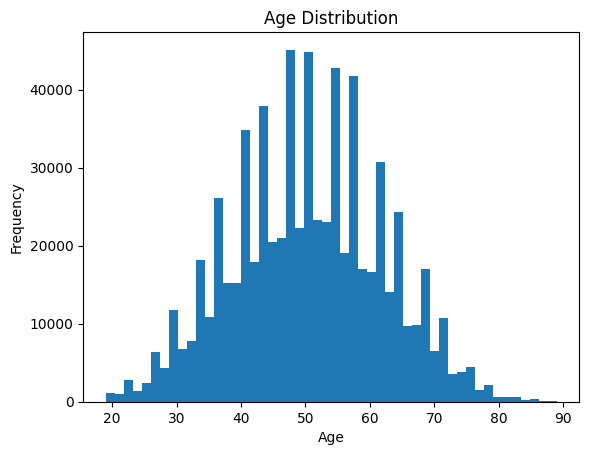

In [51]:
plt.hist(train['age'], bins=50)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## 2.3 Diabetes Rate by Age (Line / Binned)
What it shows:
- How diabetes prevalence increases with age

/var/folders/cf/yvx1ty9x60zg9rmfrmvm7pyc0000gn/T/ipykernel_6318/1996430169.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_by_age = train.groupby(age_bins)['diagnosed_diabetes'].mean()


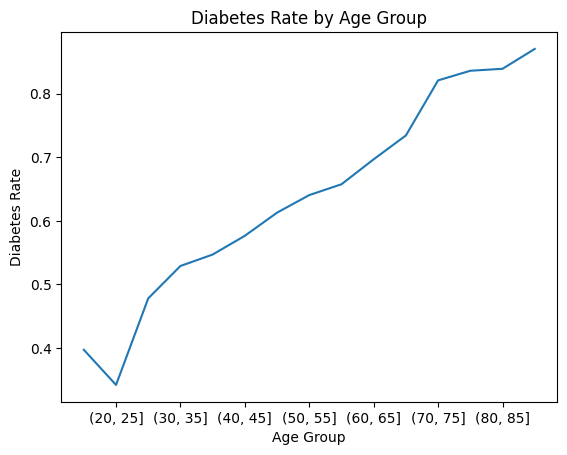

In [52]:
age_bins = pd.cut(train['age'], bins=range(0, 101, 5))
diabetes_by_age = train.groupby(age_bins)['diagnosed_diabetes'].mean()

diabetes_by_age.plot()
plt.title("Diabetes Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Diabetes Rate")
plt.show()

## 2.4 BMI Distribution (Histogram)
What it shows:
- Obesity patterns (key diabetes risk factor)

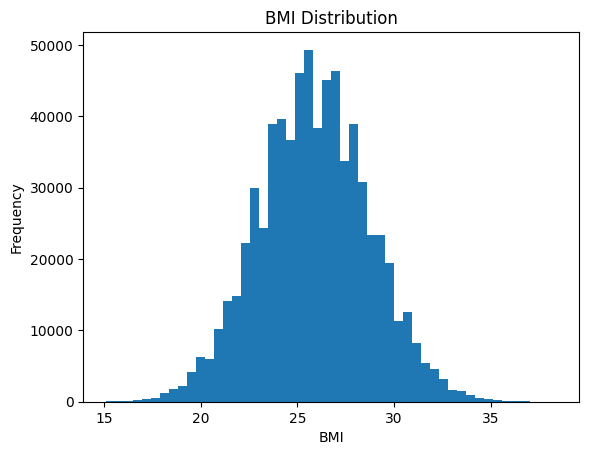

In [53]:
plt.hist(train['bmi'], bins=50)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

## 2.5 BMI vs Diabetes (Boxplot)
What it shows:
- BMI differences between diabetic vs non-diabetic

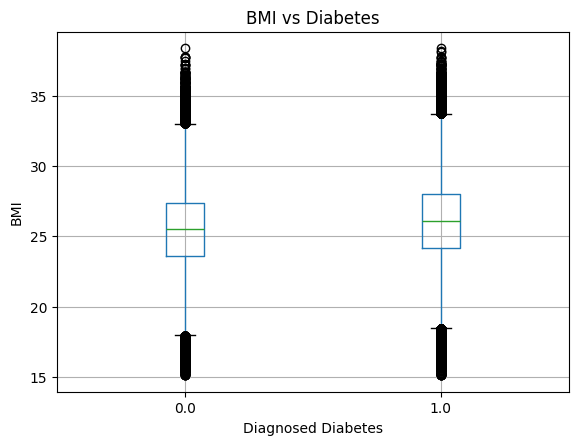

In [54]:
train.boxplot(column='bmi', by='diagnosed_diabetes')
plt.title("BMI vs Diabetes")
plt.suptitle("")
plt.xlabel("Diagnosed Diabetes")
plt.ylabel("BMI")
plt.show()

## 2.6 Lifestyle Factors vs Diabetes (Bar Chart)

### 2.6.1 smoking_status

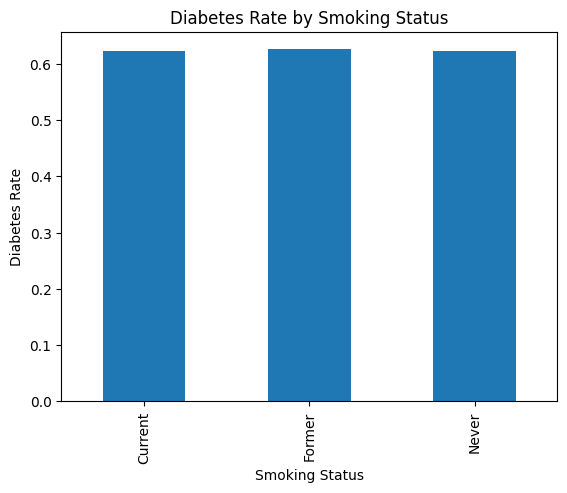

In [55]:
smoking_diabetes = train.groupby('smoking_status')['diagnosed_diabetes'].mean()

smoking_diabetes.plot(kind='bar')
plt.title("Diabetes Rate by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Diabetes Rate")
plt.show()

### 2.6.2 education_level

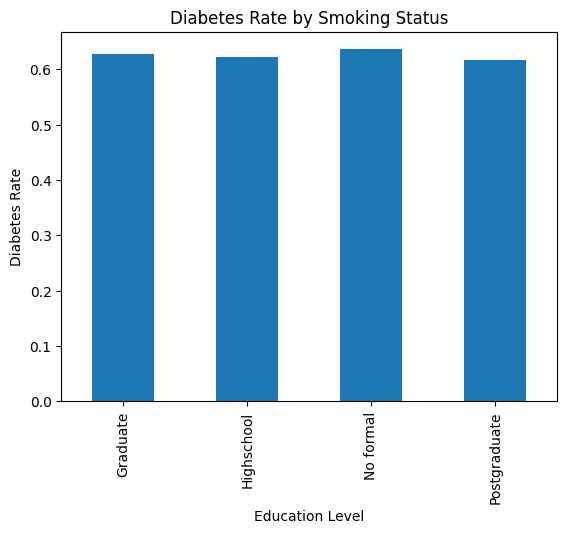

In [56]:
education_diabetes = train.groupby('education_level')['diagnosed_diabetes'].mean()

education_diabetes.plot(kind='bar')
plt.title("Diabetes Rate by Smoking Status")
plt.xlabel("Education Level")
plt.ylabel("Diabetes Rate")
plt.show()

### 2.6.3 income_level

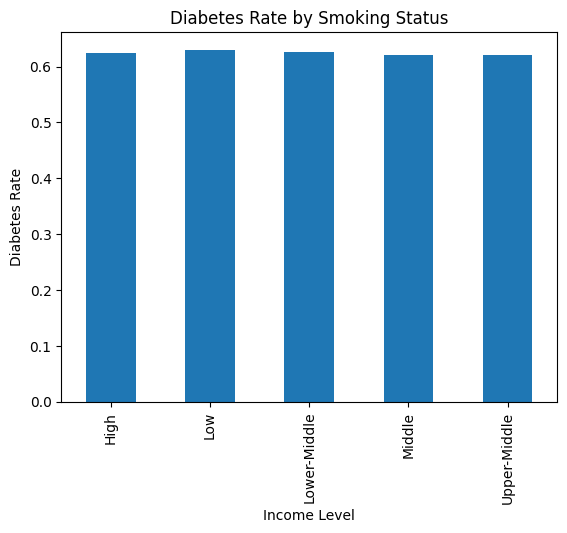

In [57]:
income_diabetes = train.groupby('income_level')['diagnosed_diabetes'].mean()

income_diabetes.plot(kind='bar')
plt.title("Diabetes Rate by Smoking Status")
plt.xlabel("Income Level")
plt.ylabel("Diabetes Rate")
plt.show()

### 2.6.4 employment_status

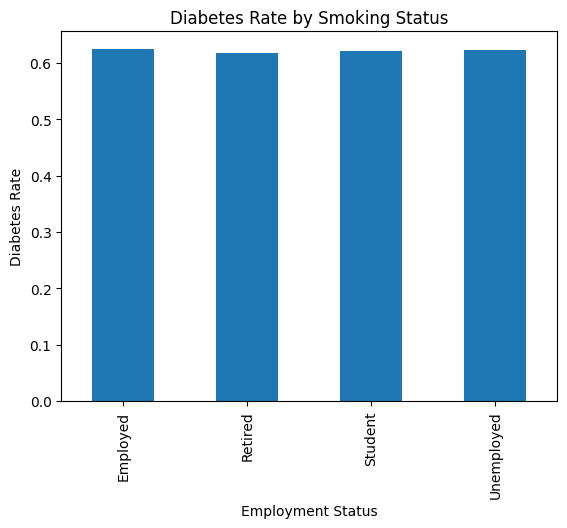

In [58]:
employment_status_diabetes = train.groupby('employment_status')['diagnosed_diabetes'].mean()

employment_status_diabetes.plot(kind='bar')
plt.title("Diabetes Rate by Smoking Status")
plt.xlabel("Employment Status")
plt.ylabel("Diabetes Rate")
plt.show()

### 2.6.5 ethnicity

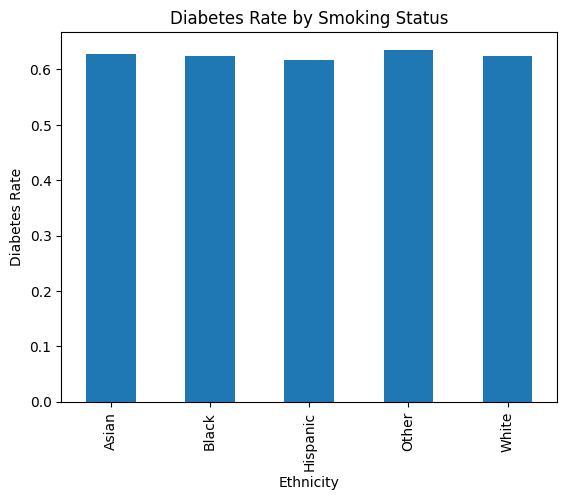

In [59]:
ethnicity_diabetes = train.groupby('ethnicity')['diagnosed_diabetes'].mean()

ethnicity_diabetes.plot(kind='bar')
plt.title("Diabetes Rate by Smoking Status")
plt.xlabel("Ethnicity")
plt.ylabel("Diabetes Rate")
plt.show()

### 2.6.6 gender

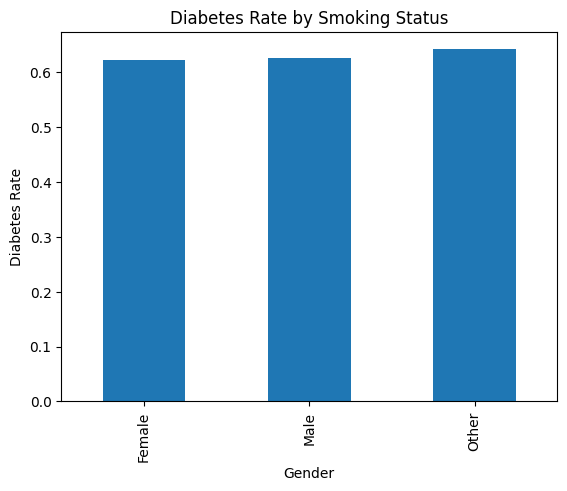

In [60]:
gender_diabetes = train.groupby('gender')['diagnosed_diabetes'].mean()

gender_diabetes.plot(kind='bar')
plt.title("Diabetes Rate by Smoking Status")
plt.xlabel("Gender")
plt.ylabel("Diabetes Rate")
plt.show()

## 2.7 Physical Activity vs Diabetes (Scatter)

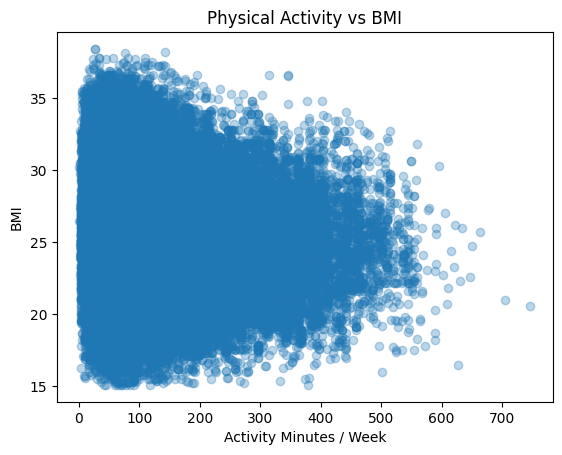

In [64]:
plt.scatter(
    train['physical_activity_minutes_per_week'],
    train['bmi'],
    alpha=0.3
)
plt.title("Physical Activity vs BMI")
plt.xlabel("Activity Minutes / Week")
plt.ylabel("BMI")
plt.show()

## 2.8 Blood Pressure vs Diabetes (Boxplot)

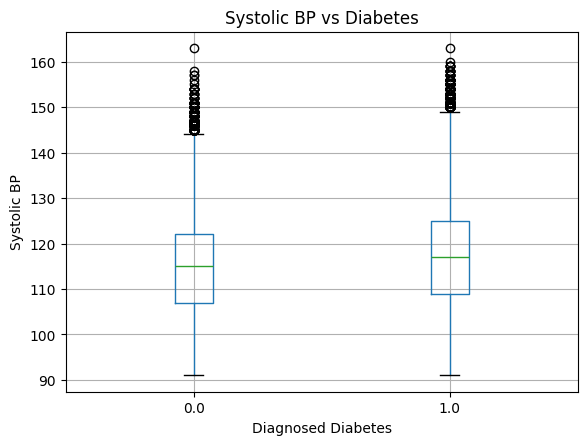

In [66]:
train.boxplot(column='systolic_bp', by='diagnosed_diabetes')
plt.title("Systolic BP vs Diabetes")
plt.suptitle("")
plt.xlabel("Diagnosed Diabetes")
plt.ylabel("Systolic BP")
plt.show()

## 2.9 Cholesterol Profile vs Diabetes (Grouped Bar)

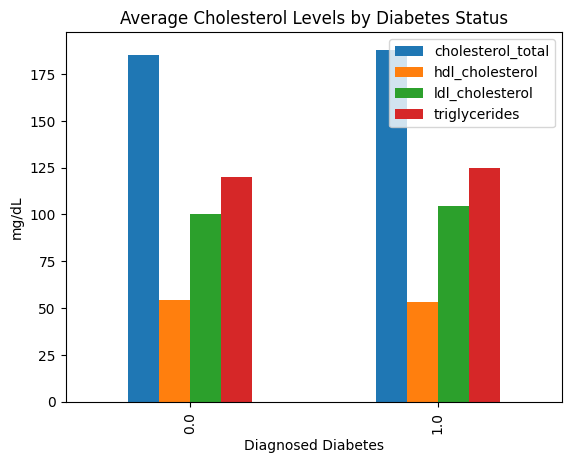

In [67]:
chol = train.groupby('diagnosed_diabetes')[[
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides'
]].mean()

chol.plot(kind='bar')
plt.title("Average Cholesterol Levels by Diabetes Status")
plt.xlabel("Diagnosed Diabetes")
plt.ylabel("mg/dL")
plt.show()

## 2.10 Screen Time vs Sleep (Scatter)

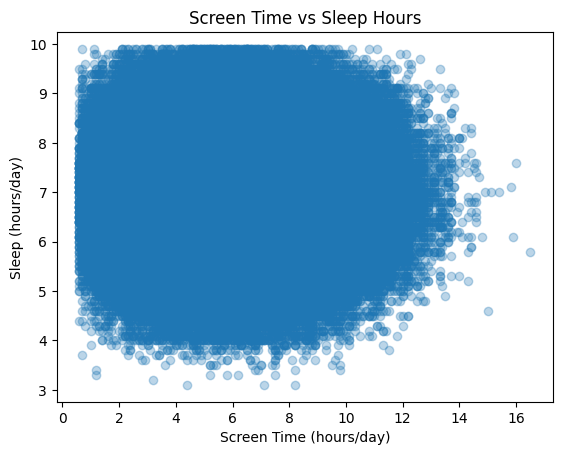

In [68]:
plt.scatter(
    train['screen_time_hours_per_day'],
    train['sleep_hours_per_day'],
    alpha=0.3
)
plt.title("Screen Time vs Sleep Hours")
plt.xlabel("Screen Time (hours/day)")
plt.ylabel("Sleep (hours/day)")
plt.show()

## 2.11 Family History Impact (Bar Chart)

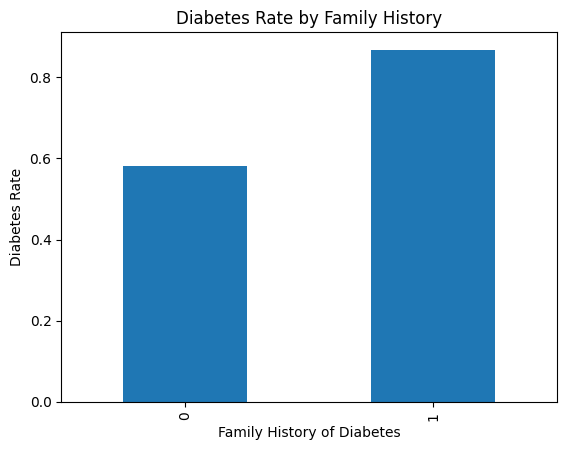

In [69]:
fh = train.groupby('family_history_diabetes')['diagnosed_diabetes'].mean()

fh.plot(kind='bar')
plt.title("Diabetes Rate by Family History")
plt.xlabel("Family History of Diabetes")
plt.ylabel("Diabetes Rate")
plt.show()

## 2.12 Gender Distribution

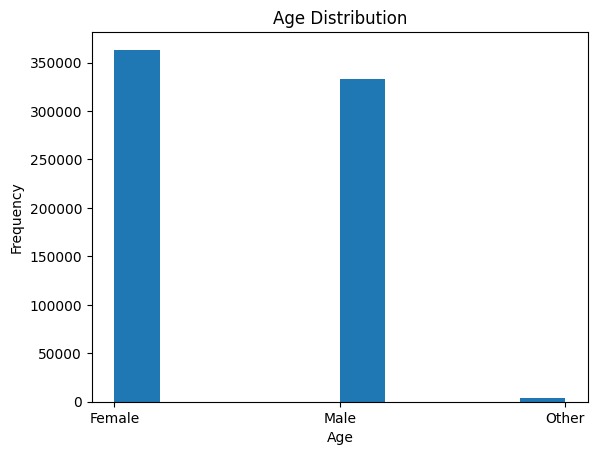

In [81]:
plt.hist(train['gender'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

## 2.13 Ethnicity Distribution

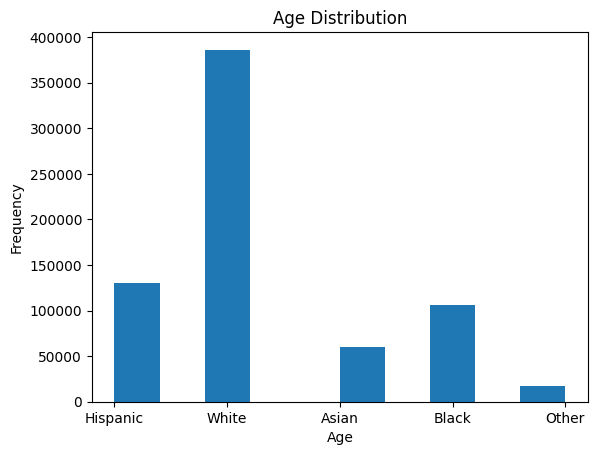

In [82]:
plt.hist(train['ethnicity'])
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Frequency")
plt.show()

## 2.13 Education Level Distribution

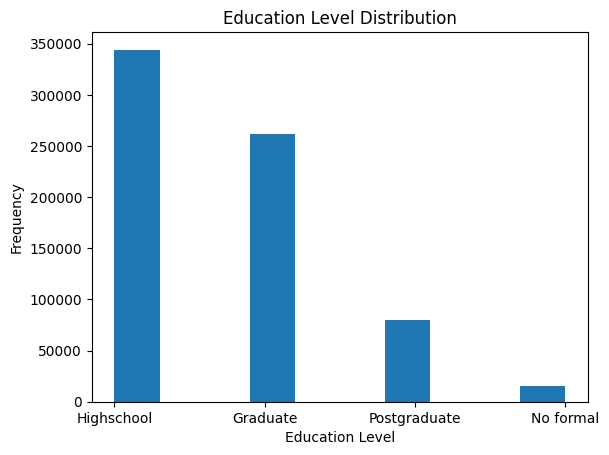

In [83]:
plt.hist(train['education_level'])
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

## 2.14 Income Level Distribution

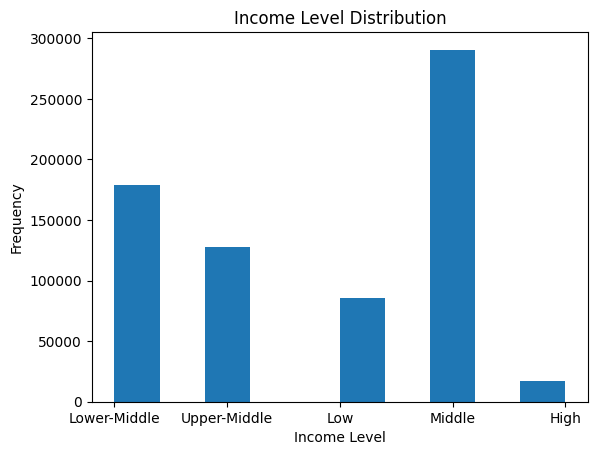

In [84]:
plt.hist(train['income_level'])
plt.title("Income Level Distribution")
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.show()

## 2.14 Smoking Status Distribution

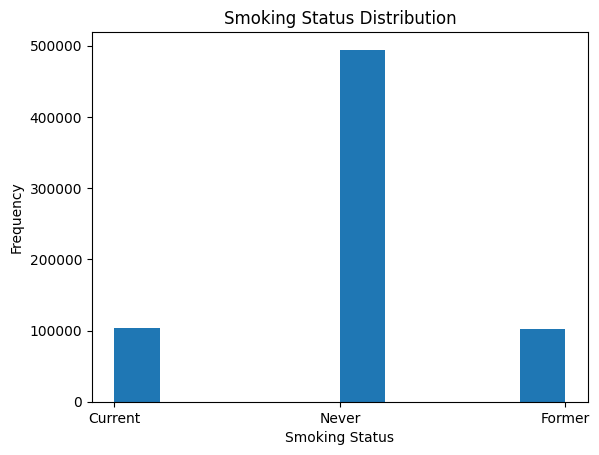

In [85]:
plt.hist(train['smoking_status'])
plt.title("Smoking Status Distribution")
plt.xlabel("Smoking Status")
plt.ylabel("Frequency")
plt.show()

## 2.14 Employment Status Distribution

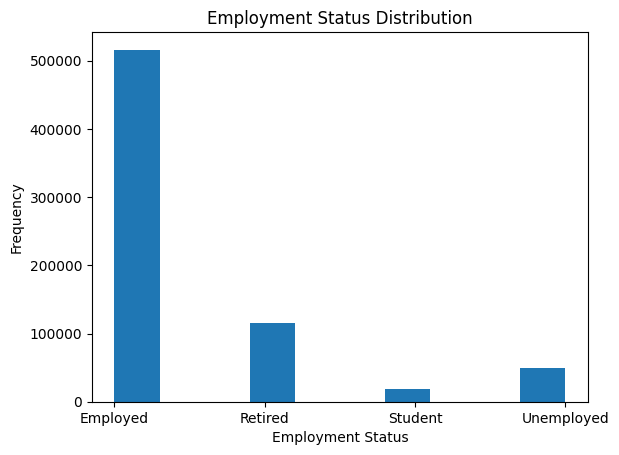

In [91]:
plt.hist(train['employment_status'])
plt.title("Employment Status Distribution")
plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.show()

## 2.15 Correlation Heatmap (All Values)

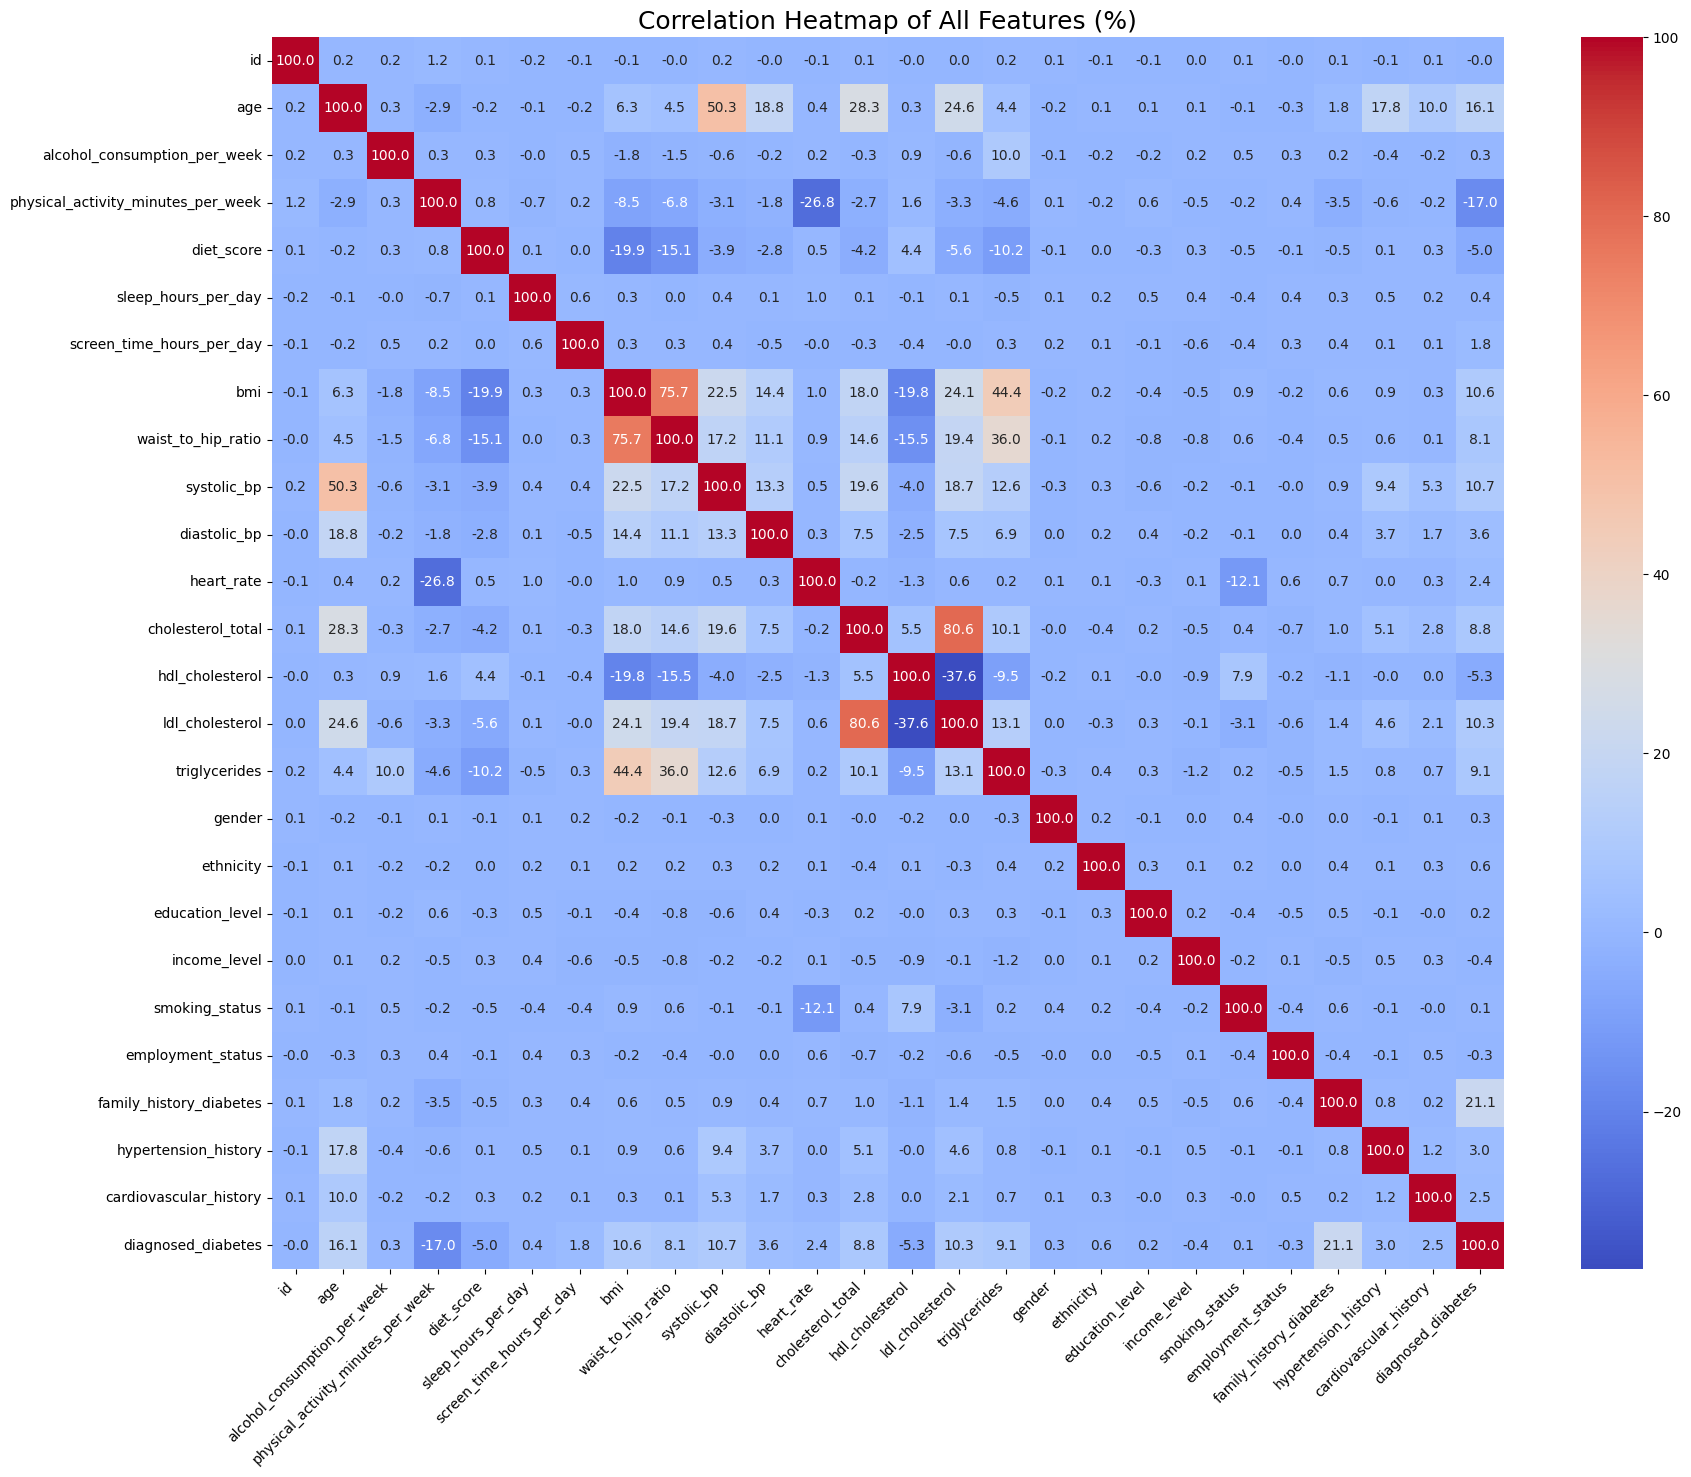

In [93]:
df_encoded = train.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col], _ = pd.factorize(df_encoded[col])  # converts categories to integers

corr_all = df_encoded.corr()
corr_percent = corr_all * 100

plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_percent,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap of All Features (%)", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [107]:
from scipy.stats import pointbiserialr
import numpy as np

results = []

target = train['diagnosed_diabetes']

for col in train.columns:
    if col == 'diagnosed_diabetes':
        continue

    if train[col].dtype in ['int64', 'float64']:
        corr, _ = pointbiserialr(train[col], target)
        method = 'point-biserial'
    else:
        ct = pd.crosstab(train[col], target)
        chi2 = chi2_contingency(ct)[0]
        n = ct.sum().sum()
        r, k = ct.shape
        corr = np.sqrt(chi2 / (n * (min(k - 1, r - 1))))
        method = 'cramers_v'

    results.append((col, corr, corr * 100, method))

corr_table = pd.DataFrame(
    results,
    columns=['feature', 'correlation', 'correlation_%', 'method']
).sort_values(key=lambda x: x.abs(), by='correlation', ascending=False)

corr_table.sort_values(by='correlation_%', ascending=False).reset_index(drop=True)

,feature,correlation,correlation_%,method
0,family_history_diabetes,0.211064,21.106416,point-biserial
1,age,0.161162,16.116245,point-biserial
2,systolic_bp,0.107132,10.713174,point-biserial
3,bmi,0.105580,10.557997,point-biserial
4,ldl_cholesterol,0.102771,10.277130,point-biserial
5,triglycerides,0.090635,9.063549,point-biserial
6,cholesterol_total,0.088112,8.811224,point-biserial
7,waist_to_hip_ratio,0.081050,8.105000,point-biserial
8,diastolic_bp,0.036271,3.627073,point-biserial
9,hypertension_history,0.029979,2.997947,point-biserial


In [144]:
train.dtypes

id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
smoking_status                         object
employment_status                 

In [182]:
categorical_features = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'smoking_status',
    'employment_status'
]

In [183]:
numerical_features = [
    # 'id',
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi',
    'waist_to_hip_ratio',
    'systolic_bp',
    'diastolic_bp',
    'heart_rate',
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides',
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history'
]


## 2.16 Correlation Heatmap (Numerical Values)

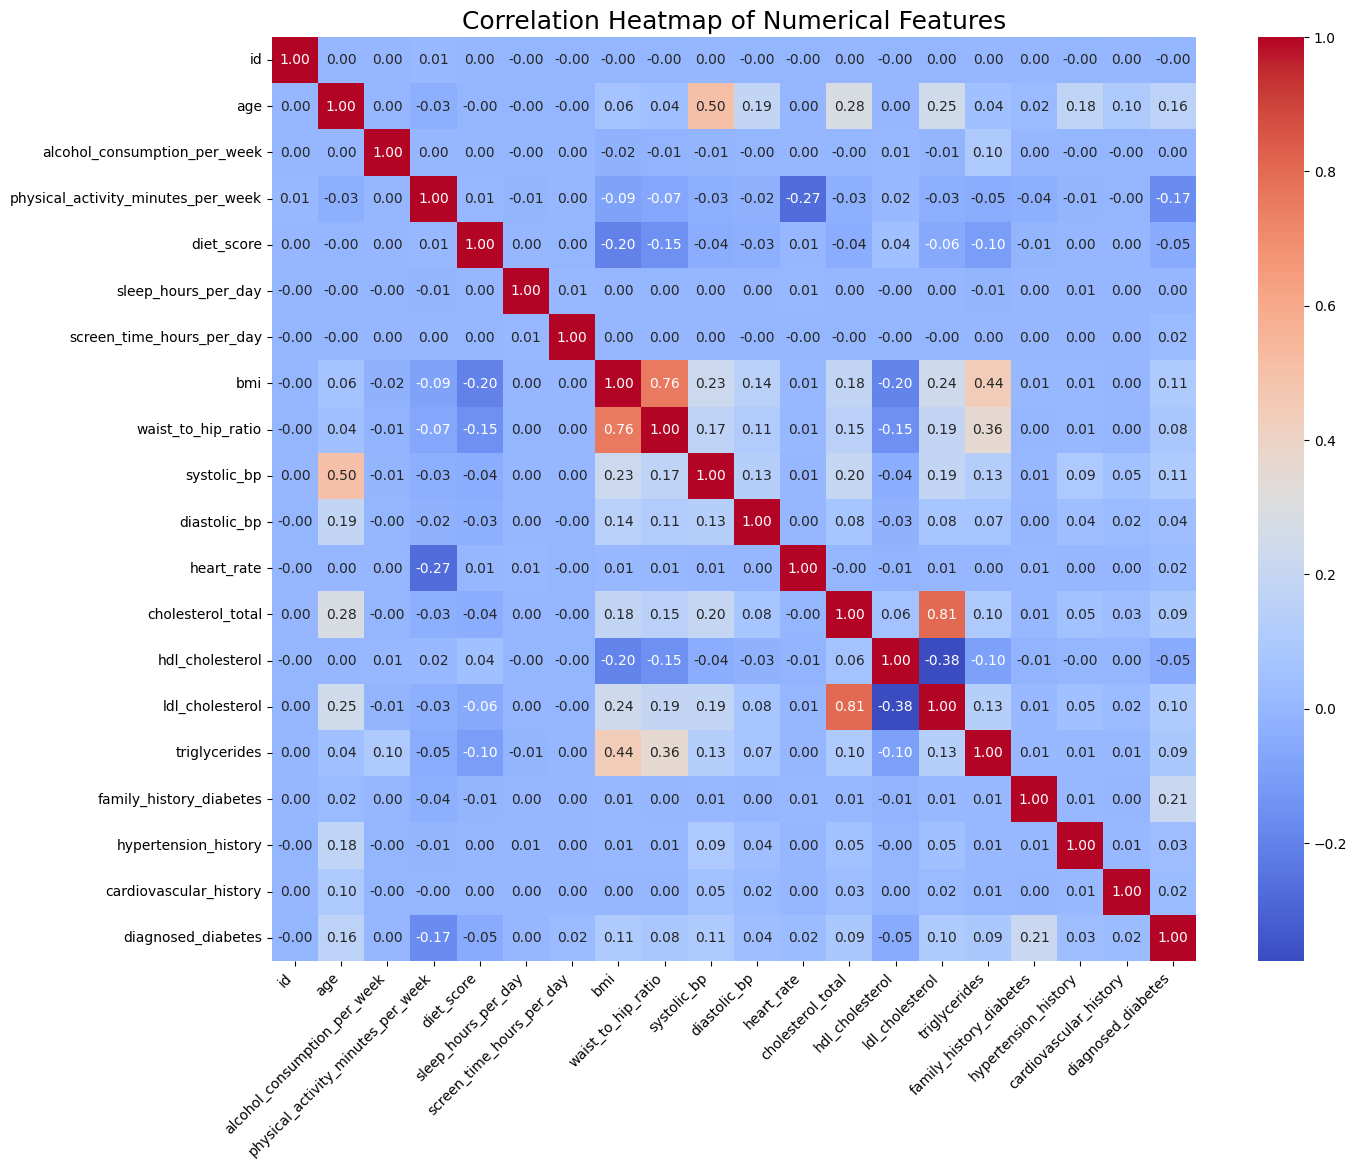

In [ ]:
numeric_cols = train.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr, 
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## 2.17 Correlation Heatmap (Categorical Values)

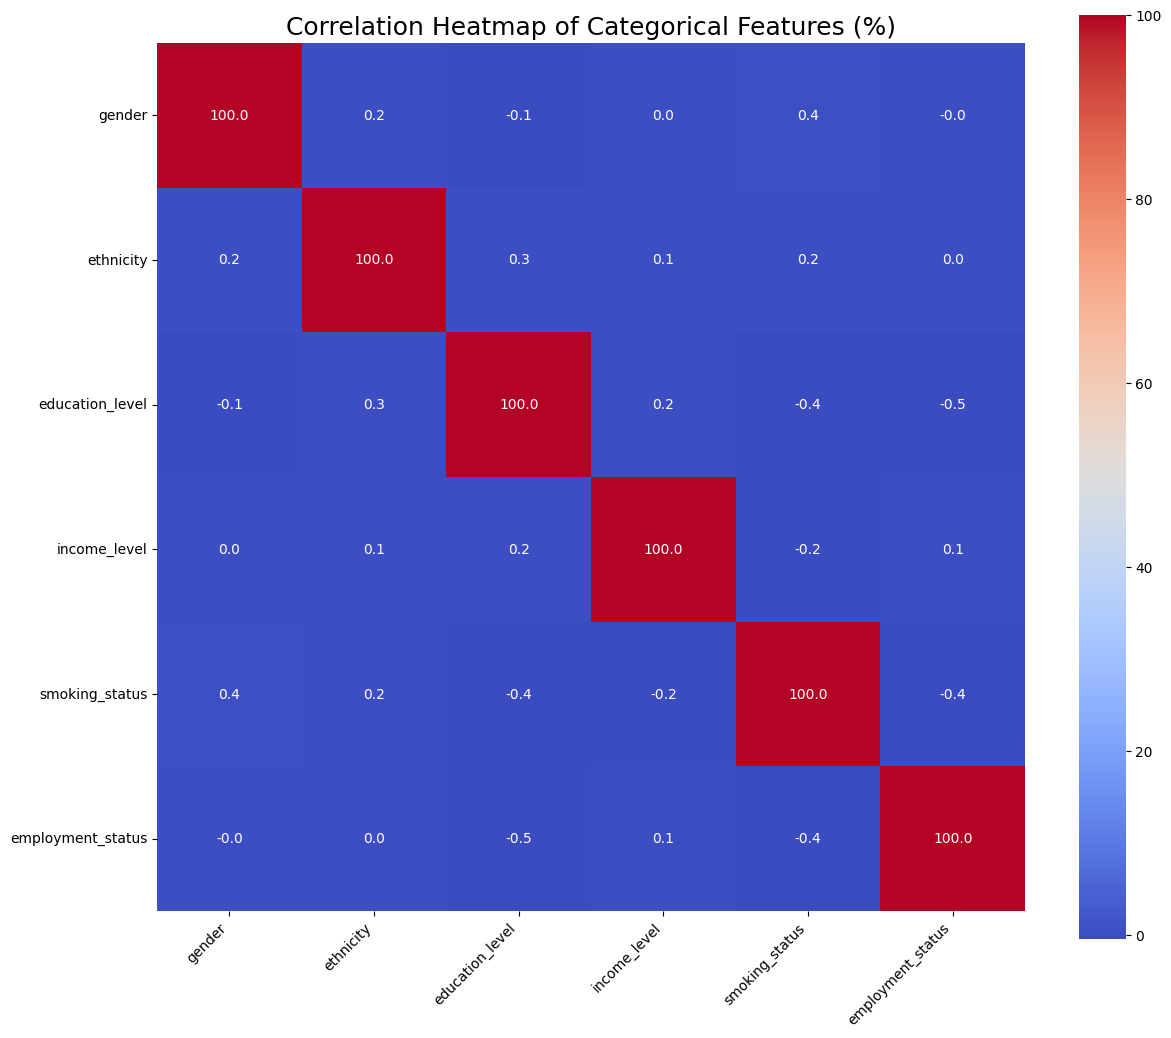

In [95]:
cat_cols = train.select_dtypes(include=['object']).columns
df_cat_encoded = train[cat_cols].apply(lambda x: pd.factorize(x)[0])
corr_cat = df_cat_encoded.corr()
corr_cat_percent = corr_cat * 100

plt.figure(figsize=(14,12))
sns.heatmap(
    corr_cat_percent,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    square=True,
    cbar=True
)
plt.title("Correlation Heatmap of Categorical Features (%)", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


# 3. Model Selection - Classification Model

In [98]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score,
    recall_score, roc_auc_score
)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


def model_selection_classification(
    train_df,
    target_col="diagnosed_diabetes",
    drop_cols=["id"],
    random_state=42
):
    print(f"\n=== MODEL SELECTION FOR TARGET: {target_col} ===")

    # -----------------------------
    # 1. Prepare features & target
    # -----------------------------
    X = train_df.drop(columns=[target_col] + drop_cols, errors="ignore").copy()
    y = train_df[target_col]

    pos_rate = y.mean()
    print(f"Positive cases: {y.sum()} ({pos_rate:.2%})")

    # -----------------------------
    # 2. Detect categorical columns
    # -----------------------------
    categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
    numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

    # -----------------------------
    # 3. Train / validation split
    # -----------------------------
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=0.2,
        stratify=y,
        random_state=random_state
    )

    # -----------------------------
    # 4. Encode categorical features
    # -----------------------------
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_val[col] = le.transform(X_val[col])
        encoders[col] = le

    # -----------------------------
    # 5. Models to test
    # -----------------------------
    models = {
        "Logistic Regression": LogisticRegression(
            max_iter=10000,
            class_weight="balanced",
            random_state=random_state
        ),
        "Random Forest": RandomForestClassifier(
            n_estimators=200,
            class_weight="balanced",
            random_state=random_state
        ),
        "Gradient Boosting": GradientBoostingClassifier(
            random_state=random_state
        ),
        "Decision Tree": DecisionTreeClassifier(
            class_weight="balanced",
            random_state=random_state
        ),
        "XGBoost": xgb.XGBClassifier(
            eval_metric="logloss",
            scale_pos_weight=(1 - pos_rate) / pos_rate,
            random_state=random_state
        )
    }

    # -----------------------------
    # 6. Cross-validation
    # -----------------------------
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    results = []

    print("\nMODEL COMPARISON")
    print("-" * 130)
    print(f"{'Model':<20} {'Acc':<8} {'F1':<8} {'Prec':<8} {'Rec':<8} {'ROC':<8} {'CV_Acc':<8} {'CV_F1':<8} {'CV_ROC':<8}")
    print("-" * 130)

    for name, model in models.items():
        # Cross-validation
        cv_acc = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy").mean()
        cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1").mean()
        cv_roc = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc").mean()

        # Fit & predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_val)[:, 1]
            roc = roc_auc_score(y_val, y_proba)
        else:
            roc = roc_auc_score(y_val, y_pred)

        results.append({
            "Model": name,
            "Test_Accuracy": acc,
            "Test_F1": f1,
            "Test_Precision": prec,
            "Test_Recall": rec,
            "Test_ROC_AUC": roc,
            "CV_Accuracy": cv_acc,
            "CV_F1": cv_f1,
            "CV_ROC_AUC": cv_roc
        })

        print(f"{name:<20} {acc:<8.3f} {f1:<8.3f} {prec:<8.3f} {rec:<8.3f} {roc:<8.3f} {cv_acc:<8.3f} {cv_f1:<8.3f} {cv_roc:<8.3f}")

    results_df = pd.DataFrame(results).sort_values("Test_ROC_AUC", ascending=False)

    # -----------------------------
    # 7. Baseline comparison
    # -----------------------------
    baseline = max(pos_rate, 1 - pos_rate)
    print("\nBASELINE")
    print(f"Majority class accuracy: {baseline:.3f}")
    print(f"Best model improvement: +{results_df.iloc[0]['Test_Accuracy'] - baseline:.3f}")

    return results_df, models, encoders

In [99]:
results_df, models, encoders = model_selection_classification(
    train_df=train,
    target_col="diagnosed_diabetes",
    drop_cols=["id"]
)


=== MODEL SELECTION FOR TARGET: diagnosed_diabetes ===
Positive cases: 436307.0 (62.33%)
Categorical columns (6): ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
Numerical columns (18): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']

MODEL COMPARISON
----------------------------------------------------------------------------------------------------------------------------------
Model                Acc      F1       Prec     Rec      ROC      CV_Acc   CV_F1    CV_ROC  
----------------------------------------------------------------------------------------------------------------------------------
Logistic Regression

# 4. Hyperparameter tuning - XGBoost - Classification Model

In [211]:
# ==================== DATA PREPARATION ====================
train_df = train[categorical_features + numerical_features + ['diagnosed_diabetes']].copy()

X = train_df.drop(columns=['diagnosed_diabetes'])
y = train_df['diagnosed_diabetes']

pos_rate = y.mean()
print(f"Positive class rate: {pos_rate:.2%}")

Positive class rate: 62.33%


In [212]:
# ==================== FEATURE ENGINEERING ====================
# One-Hot Encoding for categorical columns
X_encoded = pd.get_dummies(
    X, 
    columns=['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status'], 
    drop_first=True
)

# Feature Engineering - Create interaction features
X_encoded['age_bmi_interaction'] = X_encoded['age'] * X_encoded['bmi']
X_encoded['bp_bmi_interaction'] = X_encoded['systolic_bp'] * X_encoded['bmi']
X_encoded['age_squared'] = X_encoded['age'] ** 2
X_encoded['bp_ratio'] = X_encoded['systolic_bp'] / (X_encoded['diastolic_bp'] + 1)
X_encoded['chol_ratio'] = X_encoded['cholesterol_total'] / (X_encoded['hdl_cholesterol'] + 1)

print(f"Total features after engineering: {X_encoded.shape[1]}")

Total features after engineering: 41


In [213]:
# ==================== FEATURE SCALING ====================
# Identify numerical columns to scale
numerical_cols_to_scale = [
    'age', 
    'bmi', 
    'systolic_bp', 
    'diastolic_bp', 
    'heart_rate', 
    'cholesterol_total', 
    'hdl_cholesterol', 
    'ldl_cholesterol', 
    'triglycerides',
    'alcohol_consumption_per_week', 
    'physical_activity_minutes_per_week',
    'diet_score', 
    'sleep_hours_per_day', 
    'screen_time_hours_per_day',
    'waist_to_hip_ratio'
]

scaler = StandardScaler()
X_encoded[numerical_cols_to_scale] = scaler.fit_transform(X_encoded[numerical_cols_to_scale])

In [214]:
# ==================== TRAIN-VALIDATION SPLIT ====================
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (560000, 41)
Validation set: (140000, 41)


In [ ]:
# ==================== XGBOOST HYPERPARAMETER TUNING ====================
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=(1 - pos_rate) / pos_rate,
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.5, 1, 2, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'min_child_weight': [1, 3, 5, 7]
}

grid_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=150,
    cv=5,
    scoring='roc_auc',
    verbose=3,
    n_jobs=-1,
    random_state=42
)

print("\n=== TUNING XGBOOST ===")
grid_search.fit(X_train, y_train)

print(f"\nBest params: {grid_search.best_params_}")
print(f"Best CV ROC-AUC score: {grid_search.best_score_:.4f}")


=== TUNING XGBOOST ===
Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=300, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9;, score=0.713 total time=  13.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=300, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9;, score=0.711 total time=  13.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=300, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9;, score=0.711 total time=  13.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=300, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9;, score=0.712 total time=  13.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=300, reg_alpha=0.5, reg_lambda=0.5, subsample=0.9;, score=0.711 total time= 

In [ ]:
# ==================== EVALUATION ON VALIDATION SET ====================
best_model = grid_search.best_estimator_
y_probs = best_model.predict_proba(X_val)[:, 1]
y_preds = best_model.predict(X_val)

acc = accuracy_score(y_val, y_preds)
f1 = f1_score(y_val, y_preds)
prec = precision_score(y_val, y_preds)
rec = recall_score(y_val, y_preds)
roc_auc = roc_auc_score(y_val, y_probs)

print("\n=== VALIDATION METRICS (XGBoost) ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


=== VALIDATION METRICS ===
Accuracy: 0.6528
F1-Score: 0.6924
Precision: 0.7732
Recall: 0.6270
ROC-AUC: 0.7238


In [ ]:
# ==================== THRESHOLD OPTIMIZATION ====================
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_val, (y_probs > t).astype(int)) if np.sum((y_probs > t).astype(int)) > 0 else 0 for t in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print(f"F1-Score at optimal threshold: {np.max(f1_scores):.4f}")

# Recompute predictions with optimal threshold
y_preds_opt = (y_probs > optimal_threshold).astype(int)
f1_opt = f1_score(y_val, y_preds_opt)
acc_opt = accuracy_score(y_val, y_preds_opt)

print(f"Accuracy at optimal threshold: {acc_opt:.4f}")
print(f"F1-Score at optimal threshold: {f1_opt:.4f}")


Optimal threshold: 0.280
F1-Score at optimal threshold: 0.7796
Accuracy at optimal threshold: 0.6649
F1-Score at optimal threshold: 0.7796


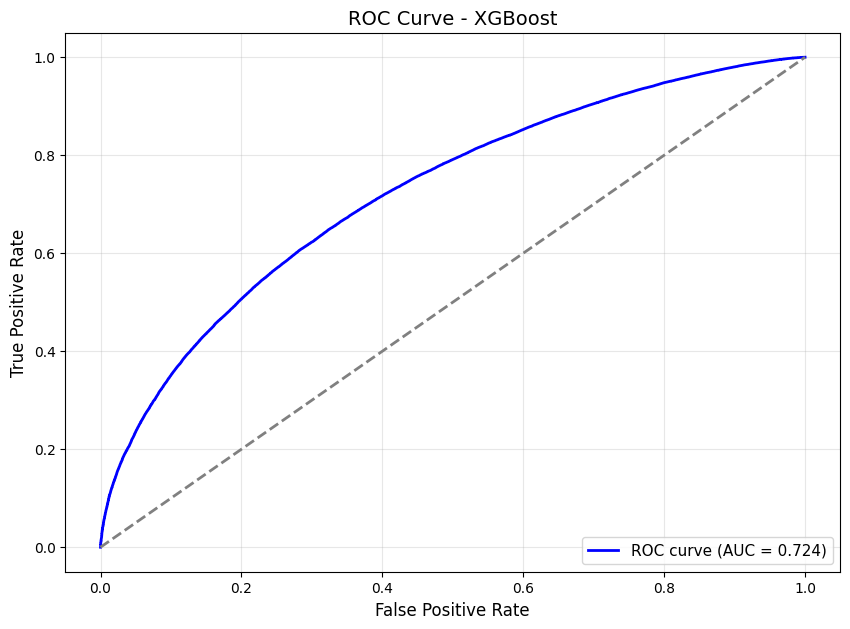

In [ ]:
# ==================== ROC CURVE PLOT ====================
fpr, tpr, _ = roc_curve(y_val, y_probs)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - XGBoost', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# ==================== PREPARE TEST DATA ====================
X_test = test[categorical_features + numerical_features].copy()

# One-Hot Encoding for test data
X_test_encoded = pd.get_dummies(
    X_test, 
    columns=['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status'], 
    drop_first=True
)

# Add feature engineering to test data
X_test_encoded['age_bmi_interaction'] = X_test_encoded['age'] * X_test_encoded['bmi']
X_test_encoded['bp_bmi_interaction'] = X_test_encoded['systolic_bp'] * X_test_encoded['bmi']
X_test_encoded['age_squared'] = X_test_encoded['age'] ** 2
X_test_encoded['bp_ratio'] = X_test_encoded['systolic_bp'] / (X_test_encoded['diastolic_bp'] + 1)
X_test_encoded['chol_ratio'] = X_test_encoded['cholesterol_total'] / (X_test_encoded['hdl_cholesterol'] + 1)

# Scale test data
X_test_encoded[numerical_cols_to_scale] = scaler.transform(X_test_encoded[numerical_cols_to_scale])

# Ensure test set has same columns as training set
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

In [ ]:
# ==================== MAKE PREDICTIONS ====================
y_test_probs = best_model.predict_proba(X_test_encoded)[:, 1]

# Apply optimal threshold
y_test_preds = (y_test_probs > optimal_threshold).astype(int)

In [ ]:
# ==================== CREATE SUBMISSION ====================
submission = pd.DataFrame({
    'id': test['id'],
    'diagnosed_diabetes': y_test_probs
})

submission.to_csv('submission.csv', index=False)

print("\n=== SUBMISSION CREATED ===")
print(submission.head())
print(f"Submission shape: {submission.shape}")
print(f"Prediction distribution:\n{submission['diagnosed_diabetes'].describe()}")

In [216]:
# ==================== METHOD 1: ENSEMBLE VOTING CLASSIFIER ====================
print("\n" + "="*80)
print("METHOD 1: ENSEMBLE VOTING CLASSIFIER")
print("="*80)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Create Voting Classifier (soft voting uses probabilities)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_model),
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    voting='soft'
)

# ✅ FIT THE VOTING CLASSIFIER (THIS WAS MISSING!)
voting_clf.fit(X_train, y_train)

# Evaluate ensemble on validation set
y_probs_ensemble_val = voting_clf.predict_proba(X_val)[:, 1]
roc_auc_ensemble = roc_auc_score(y_val, y_probs_ensemble_val)
acc_ensemble = accuracy_score(y_val, (y_probs_ensemble_val > optimal_threshold).astype(int))
f1_ensemble = f1_score(y_val, (y_probs_ensemble_val > optimal_threshold).astype(int))

print(f"Ensemble ROC-AUC: {roc_auc_ensemble:.4f} (XGBoost: {roc_auc:.4f})")
print(f"Ensemble Accuracy: {acc_ensemble:.4f}")
print(f"Ensemble F1-Score: {f1_ensemble:.4f}")

# Get ensemble predictions for test set
y_test_probs_ensemble = voting_clf.predict_proba(X_test_encoded)[:, 1]

submission_ensemble = pd.DataFrame({
    'id': test['id'],
    'diagnosed_diabetes': y_test_probs_ensemble
})

submission_ensemble.to_csv('submission_ensemble.csv', index=False)
print("\n✓ Ensemble submission created: submission_ensemble.csv")


METHOD 1: ENSEMBLE VOTING CLASSIFIER
Ensemble ROC-AUC: 0.7192 (XGBoost: 0.7238)
Ensemble Accuracy: 0.6463
Ensemble F1-Score: 0.7760

✓ Ensemble submission created: submission_ensemble.csv


In [221]:
# ==================== METHOD 2: K-FOLD AVERAGING ====================
print("\n" + "="*80)
print("METHOD 2: K-FOLD AVERAGING")
print("="*80)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
test_preds_kfold = np.zeros((X_test_encoded.shape[0], n_splits))

# ✅ FIX: Use X_train.shape[0] instead of X_val.shape[0]
val_preds_kfold = np.zeros((X_train.shape[0], n_splits))

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    X_tr = X_train.iloc[train_idx]
    y_tr = y_train.iloc[train_idx]
    X_v = X_train.iloc[val_idx]  # This is a subset of X_train
    
    # Train XGBoost on this fold
    fold_model = xgb.XGBClassifier(
        **grid_search.best_params_,
        scale_pos_weight=(1 - pos_rate) / pos_rate,
        random_state=42,
        n_jobs=-1
    )
    fold_model.fit(X_tr, y_tr)
    
    # Predictions on test and validation (fold)
    test_preds_kfold[:, fold] = fold_model.predict_proba(X_test_encoded)[:, 1]
    val_preds_kfold[val_idx, fold] = fold_model.predict_proba(X_v)[:, 1]  # ✅ Store at correct indices

# Average predictions
y_test_probs_kfold = test_preds_kfold.mean(axis=1)
y_train_probs_kfold = val_preds_kfold.mean(axis=1)  # ✅ Changed from y_val to y_train

# ✅ Now evaluate on the full training data that was used in K-Fold
roc_auc_kfold = roc_auc_score(y_train, y_train_probs_kfold)
acc_kfold = accuracy_score(y_train, (y_train_probs_kfold > optimal_threshold).astype(int))
f1_kfold = f1_score(y_train, (y_train_probs_kfold > optimal_threshold).astype(int))

print(f"\nK-Fold ROC-AUC: {roc_auc_kfold:.4f} (XGBoost: {roc_auc:.4f})")
print(f"K-Fold Accuracy: {acc_kfold:.4f}")
print(f"K-Fold F1-Score: {f1_kfold:.4f}")

submission_kfold = pd.DataFrame({
    'id': test['id'],
    'diagnosed_diabetes': y_test_probs_kfold
})

submission_kfold.to_csv('submission_kfold.csv', index=False)
print("\n✓ K-Fold submission created: submission_kfold.csv")


METHOD 2: K-FOLD AVERAGING
Training fold 1/5...
Training fold 2/5...
Training fold 3/5...
Training fold 4/5...
Training fold 5/5...

K-Fold ROC-AUC: 0.7238 (XGBoost: 0.7238)
K-Fold Accuracy: 0.3767
K-Fold F1-Score: 0.0000

✓ K-Fold submission created: submission_kfold.csv


In [ ]:
# ==================== METHOD 3: STACKING ====================
print("\n" + "="*80)
print("METHOD 3: STACKING (META-LEARNER)")
print("="*80)

base_models = [
    ('xgb', best_model),
    ('rf', rf_model),
    ('gb', gb_model)
]

# Generate meta-features using cross-validation
meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
meta_features_val = np.zeros((X_val.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test_encoded.shape[0], len(base_models)))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (name, model) in enumerate(base_models):
    print(f"Generating meta-features for {name}...")
    
    # Train on training set and predict on validation
    model.fit(X_train, y_train)
    meta_features_val[:, i] = model.predict_proba(X_val)[:, 1]
    meta_features_test[:, i] = model.predict_proba(X_test_encoded)[:, 1]
    
    # Cross-val predictions for training data
    meta_features_train[:, i] = cross_val_predict(
        model, X_train, y_train, cv=cv, method='predict_proba'
    )[:, 1]

# Train meta-learner (Logistic Regression)
meta_learner = LogisticRegression(max_iter=10000, random_state=42)
meta_learner.fit(meta_features_train, y_train)

# Final predictions
y_val_probs_stacking = meta_learner.predict_proba(meta_features_val)[:, 1]
y_test_probs_stacking = meta_learner.predict_proba(meta_features_test)[:, 1]

# Evaluate stacking
roc_auc_stacking = roc_auc_score(y_val, y_val_probs_stacking)
acc_stacking = accuracy_score(y_val, (y_val_probs_stacking > optimal_threshold).astype(int))
f1_stacking = f1_score(y_val, (y_val_probs_stacking > optimal_threshold).astype(int))

print(f"\nStacking ROC-AUC: {roc_auc_stacking:.4f} (XGBoost: {roc_auc:.4f})")
print(f"Stacking Accuracy: {acc_stacking:.4f}")
print(f"Stacking F1-Score: {f1_stacking:.4f}")

submission_stacking = pd.DataFrame({
    'id': test['id'],
    'diagnosed_diabetes': y_test_probs_stacking
})

submission_stacking.to_csv('submission_stacking.csv', index=False)
print("\n✓ Stacking submission created: submission_stacking.csv")


METHOD 3: STACKING (META-LEARNER)
Generating meta-features for xgb...
Generating meta-features for rf...
Generating meta-features for gb...

Stacking ROC-AUC: 0.7245 (XGBoost: 0.7238)
Stacking Accuracy: 0.6437
Stacking F1-Score: 0.7754

✓ Stacking submission created: submission_stacking.csv


In [223]:
# ==================== COMPARISON SUMMARY ====================
print("\n" + "="*80)
print("SUMMARY: MODEL COMPARISON")
print("="*80)

comparison = pd.DataFrame({
    'Method': ['XGBoost (Baseline)', 'Ensemble Voting', 'K-Fold Averaging', 'Stacking'],
    'ROC-AUC': [roc_auc, roc_auc_ensemble, roc_auc_kfold, roc_auc_stacking],
    'Accuracy': [acc_opt, acc_ensemble, acc_kfold, acc_stacking],
    'F1-Score': [f1_opt, f1_ensemble, f1_kfold, f1_stacking]
})

print(comparison.to_string(index=False))
print("\n" + "="*80)


SUMMARY: MODEL COMPARISON
            Method  ROC-AUC  Accuracy  F1-Score
XGBoost (Baseline) 0.723764  0.664900  0.779579
   Ensemble Voting 0.719193  0.646279  0.776048
  K-Fold Averaging 0.723825  0.376704  0.000000
          Stacking 0.724503  0.643707  0.775358



In [224]:
# ==================== CREATE BEST SUBMISSION ====================
best_method = comparison.loc[comparison['ROC-AUC'].idxmax()]
print(f"\n🏆 Best Method: {best_method['Method']} (ROC-AUC: {best_method['ROC-AUC']:.4f})")

if best_method['Method'] == 'Ensemble Voting':
    final_probs = y_test_probs_ensemble
elif best_method['Method'] == 'K-Fold Averaging':
    final_probs = y_test_probs_kfold
elif best_method['Method'] == 'Stacking':
    final_probs = y_test_probs_stacking
else:
    final_probs = y_test_probs

submission_final = pd.DataFrame({
    'id': test['id'],
    'diagnosed_diabetes': final_probs
})

submission_final.to_csv('submission_final.csv', index=False)

print("\n=== FINAL SUBMISSION CREATED ===")
print(f"File: submission_final.csv")
print(f"Method: {best_method['Method']}")
print(submission_final.head())
print(f"Submission shape: {submission_final.shape}")
print(f"Prediction distribution:\n{submission_final['diagnosed_diabetes'].describe()}")


🏆 Best Method: Stacking (ROC-AUC: 0.7245)

=== FINAL SUBMISSION CREATED ===
File: submission_final.csv
Method: Stacking
       id  diagnosed_diabetes
0  700000            0.489109
1  700001            0.715394
2  700002            0.804787
3  700003            0.372178
4  700004            0.904139
Submission shape: (300000, 2)
Prediction distribution:
count    300000.000000
mean          0.599801
std           0.199093
min           0.121900
25%           0.444388
50%           0.612397
75%           0.767879
max           0.936538
Name: diagnosed_diabetes, dtype: float64
